## Overview

In [1]:
# Research Problem
# In the recent years, Resort Hotel and City Hotel are experiencing high cancellation rates,which is advseresly affecting their revenues.
# The data is to be analyzed to identify the main reasons for it and to uderstand what steps can be taken to improve the situation.

In [2]:
# Aim
#1) Understanding the Percentage of Reservation Cancellations
#2) Analyzing Cancellations across Time
#3) Analysing the Impact of Waiting Period on Cancellations
#4) Analysing the Impact of Customer Type on Cancellations
#5) Analyzing Cancellations per Year
#6) Analysing the Impact of Room Type on Cancellations
#7) Analysing the Impact of Market Segment on Cancellations
#8) Analyzing the number of repeated guests who have cancelled bookings
#9) Analysing the Country of Origin of Guests


## Import Libraries and Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [4]:
df=pd.read_csv(r"C:\Users\reeba\Downloads\hotel_bookings 2.csv")

## Data Preparation and Cleaning

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [8]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [9]:
df.shape

(119390, 32)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])  #convert reservation status date field to datetime datatype


In [12]:
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [13]:
df[df.duplicated()]   #check for duplicated records

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-03-07
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-01-07
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-08-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-03-09
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-03-09
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-03-09
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-03-09


In [14]:
df.drop_duplicates(inplace=True)   #drop the duplicated records

In [15]:
df.shape

(87396, 32)

In [16]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [17]:
82137/87396            #calculate the percentage of null values in company column 

0.9398256213098998

In [18]:
df.drop('company',axis=1,inplace=True)   # drop company column

In [19]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [20]:
df=df[~(df['adults']==0)]  #delete invalid rows 
df.shape

(87011, 31)

In [21]:
df.describe(include=object)    #descriptive statistics of categorical variables

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,87011,87011,87011,86564,87011,87011,87011,87011,87011,87011,87011
unique,2,12,5,177,8,5,9,11,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,53055,11210,67694,27312,51370,68842,56427,46247,85866,71726,63083


In [22]:
for i in df.describe(include=object).columns:  #to view unique values and their counts of categorical columns
    print (i)
    print(df[i].unique())
    print(df[i].value_counts())
    print ('_'*100)

hotel
['Resort Hotel' 'City Hotel']
City Hotel      53055
Resort Hotel    33956
Name: hotel, dtype: int64
____________________________________________________________________________________________________
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
August       11210
July         10011
May           8329
April         7879
June          7745
March         7473
October       6905
September     6671
February      6065
December      5089
November      4967
January       4667
Name: arrival_date_month, dtype: int64
____________________________________________________________________________________________________
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
BB           67694
SC            9389
HB            9076
Undefined      492
FB             360
Name: meal, dtype: int64
____________________________________________________________________________________________________
country
['PRT' 'GBR' 'USA' 'ESP' 

In [23]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87011.000000,87011.000000,87011.000000,87011.000000,87011.000000,87011.000000,87011.000000,87011.000000,87007.000000,87011.000000,87011.000000,87011.000000,87011.000000,87011.000000,74887.000000,87011.000000,87011.000000,87011.000000,87011.000000
mean,0.275000,79.862374,2016.210376,26.835032,15.813265,1.004643,2.624013,1.884095,0.134139,0.010838,0.038650,0.030456,0.184505,0.268253,94.428219,0.748170,106.582449,0.084495,0.698119
std,0.446517,86.007705,0.686381,13.666074,8.835787,1.027694,2.040996,0.615306,0.446651,0.113697,0.192761,0.369777,1.735186,0.710307,113.272887,10.013509,54.914732,0.281947,0.831703
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.250000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,98.330000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,134.100000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


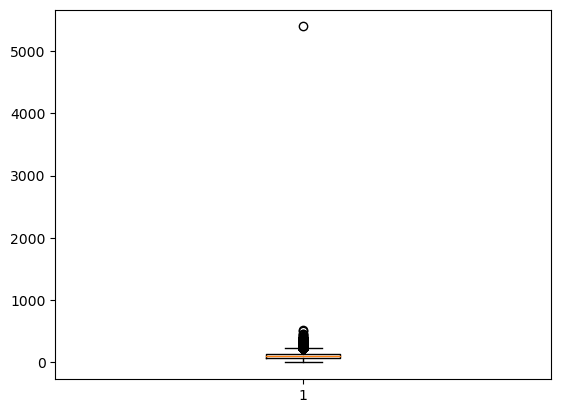

In [24]:
plt.boxplot(df['adr']);     #check for outliners

In [25]:
df=df[df['adr']<5000]   

In [26]:
df.shape

(87010, 31)

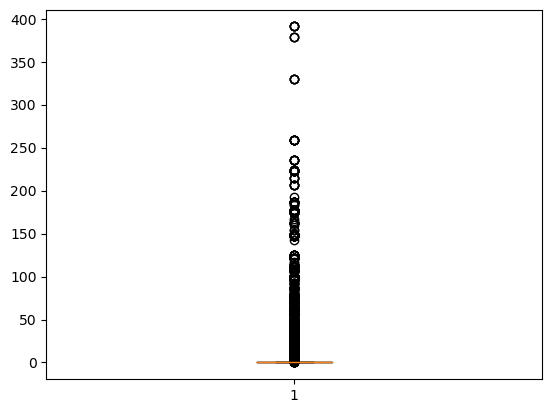

In [27]:
plt.boxplot(df['days_in_waiting_list']); #check for outliners

In [28]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-01-07
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-01-07
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-02-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-02-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-03-07


## Data Analysis and Visualizations

### 1) Understanding the Percentage of Reservation Cancellations

In [29]:
df['is_canceled'].value_counts(normalize=True)  #27.5% of overall cancellations 

0    0.725009
1    0.274991
Name: is_canceled, dtype: float64

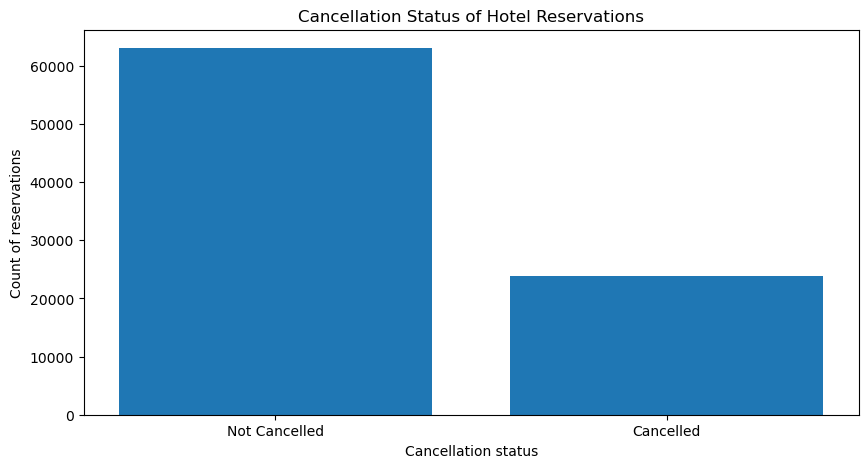

In [30]:
plt.figure(figsize=(10,5))
plt.bar(['Not Cancelled','Cancelled'],df['is_canceled'].value_counts())
plt.title("Cancellation Status of Hotel Reservations")
plt.xlabel("Cancellation status")
plt.ylabel("Count of reservations")
plt.show()


In [31]:
df['hotel'].unique()                                

array(['Resort Hotel', 'City Hotel'], dtype=object)

Text(0, 0.5, 'Count of reservations')

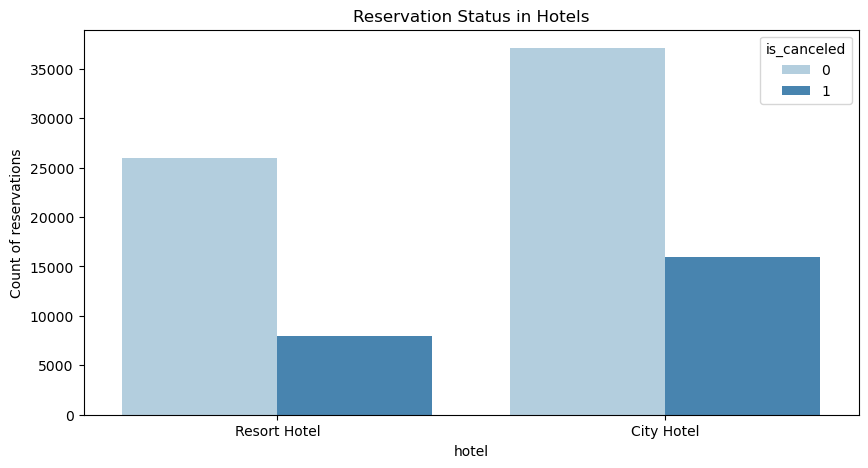

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='hotel',hue='is_canceled',palette='Blues')
plt.title("Reservation Status in Hotels")
plt.ylabel('Count of reservations')

In [33]:

df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [34]:
df.groupby('hotel')['is_canceled'].value_counts(normalize=True) #find out the percentage of cancellations in each hotel

hotel         is_canceled
City Hotel    0              0.699306
              1              0.300694
Resort Hotel  0              0.765167
              1              0.234833
Name: is_canceled, dtype: float64

### 2) Analyzing Cancellations across Time

In [35]:
df['Month']=df['reservation_status_date'].dt.month   #create column 'Month'
df_canc=df[df['is_canceled']==1]
df_canc             #dataframe with details of cancelled reservations alone

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Month
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,2015-06-05,6
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,0,Transient,105.5,0,0,Canceled,2015-04-22,4
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,No Deposit,240.0,0,Transient,123.0,0,0,Canceled,2015-06-23,6
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,No Deposit,240.0,0,Transient,107.0,0,2,Canceled,2015-11-05,11
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,No Deposit,NaN,0,Transient,108.3,0,2,Canceled,2015-05-29,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108829,City Hotel,1,25,2017,May,18,6,2,1,1,...,No Deposit,NaN,0,Transient,125.0,0,0,No-Show,2017-06-05,6
111355,City Hotel,1,4,2017,June,23,5,1,0,1,...,No Deposit,NaN,0,Transient,65.0,0,0,Canceled,2017-05-06,5
111924,City Hotel,1,7,2017,May,22,31,0,1,1,...,No Deposit,NaN,0,Transient,65.0,0,0,Canceled,2017-05-31,5
111925,City Hotel,1,6,2017,July,29,17,1,0,1,...,No Deposit,NaN,0,Transient,65.0,0,0,No-Show,2017-07-17,7


Text(0.5, 1.0, 'Month-wise Cancellations')

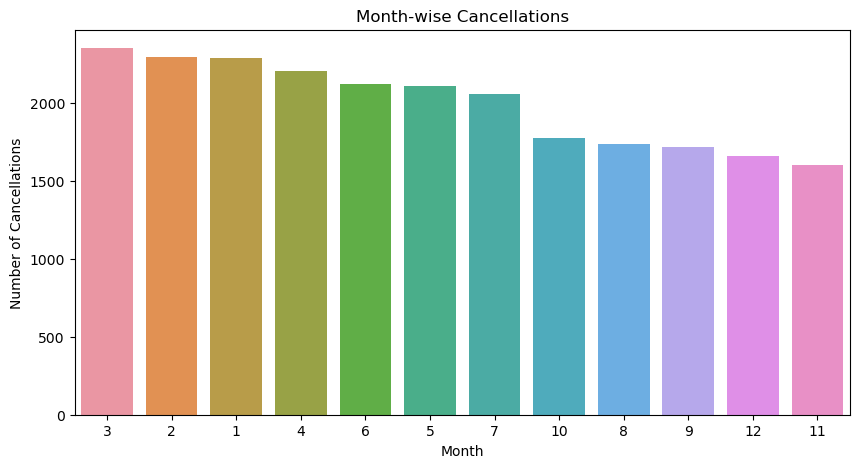

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(x='Month',data=df_canc,order=df_canc['Month'].value_counts(ascending=False).index)
plt.ylabel('Number of Cancellations')
plt.title("Month-wise Cancellations")

In [37]:
#df.head()

In [38]:
#df_canc.head()

In [39]:
df3=df.groupby('Month')['adr'].mean().sort_values(ascending=False).reset_index()
df3=pd.DataFrame(df3)
df3

,Month,adr
0,8,131.960956
1,7,126.884677
2,6,115.690290
3,5,112.410292
4,4,108.387447
5,9,108.107246
6,3,98.031312
7,2,95.178319
8,10,95.152193
9,12,92.588035


<BarContainer object of 12 artists>

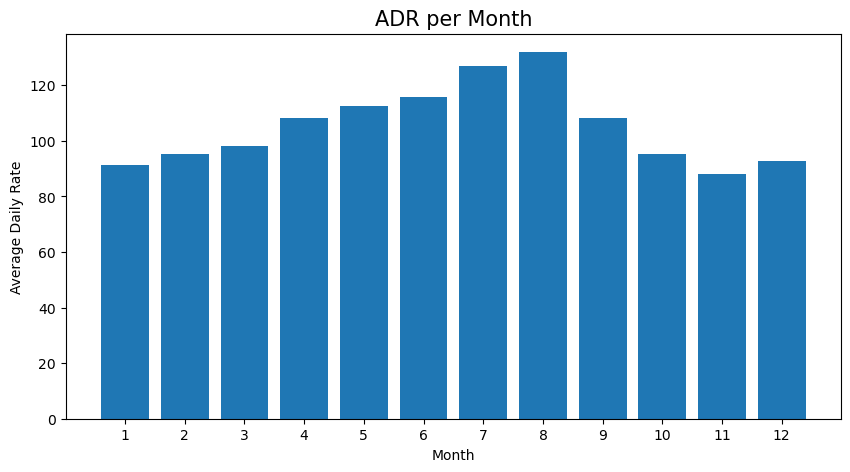

In [40]:
plt.figure(figsize=(10,5))
plt.xlabel("Month")
plt.ylabel("Average Daily Rate")
plt.title("ADR per Month",size=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.bar(df3['Month'],df3['adr'])


### 3) Analysing the Impact of Waiting Period on Cancellations

In [41]:
df_canc['days_in_waiting_list'].value_counts(normalize=True).sort_values()

85     0.000042
13     0.000042
12     0.000042
54     0.000042
121    0.000042
         ...   
46     0.000334
44     0.000334
39     0.000376
31     0.000460
0      0.987713
Name: days_in_waiting_list, Length: 105, dtype: float64

### 4) Analysing the Impact of Customer Type on Cancellations

In [171]:
c=df_canc['customer_type'].value_counts(normalize=True).sort_values(ascending=False).reset_index()
c.columns=['Customer Type','Percentage of Cancellations']
c

,Customer Type,Percentage of Cancellations
0,Transient,0.902871
1,Transient-Party,0.073515
2,Contract,0.021398
3,Group,0.002215


Text(0, 0.5, 'Cancellation')

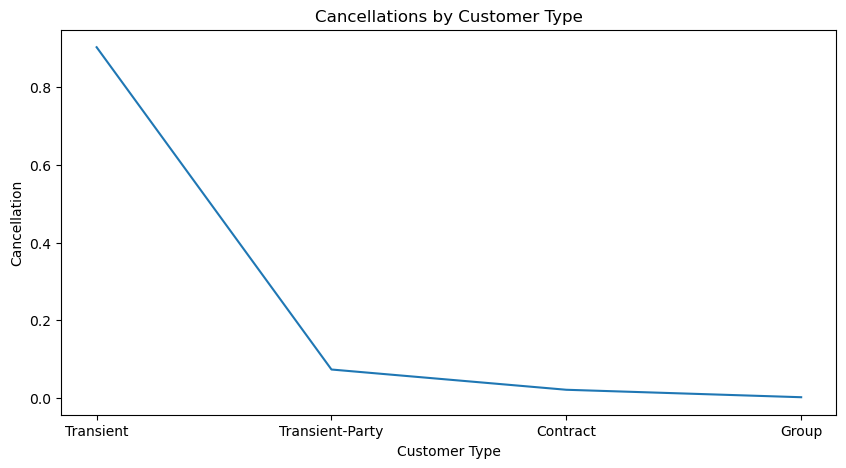

In [177]:
plt.figure(figsize=(10,5))
plt.title("Cancellations by Customer Type")
plt.plot(c['Customer Type'],c['Percentage of Cancellations'])
plt.xlabel("Customer Type")
plt.ylabel ("Cancellation")

### 5) Analyzing Cancellations per Year

In [44]:
city_canc=df_canc[df_canc['hotel']=='City Hotel']
city_canc['arrival_date_year'].value_counts(normalize=True).sort_values()

2015    0.088698
2017    0.426503
2016    0.484799
Name: arrival_date_year, dtype: float64

In [45]:
#city_canc

In [46]:
resort_canc=df_canc[df_canc['hotel']=='Resort Hotel']
resort_canc['arrival_date_year'].value_counts(normalize=True).sort_values()

2015    0.160898
2017    0.410584
2016    0.428518
Name: arrival_date_year, dtype: float64

In [47]:
df_canc.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Month
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,2015-06-05,6
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,0,Transient,105.5,0,0,Canceled,2015-04-22,4
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,No Deposit,240.0,0,Transient,123.0,0,0,Canceled,2015-06-23,6
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,No Deposit,240.0,0,Transient,107.0,0,2,Canceled,2015-11-05,11
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,No Deposit,NaN,0,Transient,108.3,0,2,Canceled,2015-05-29,5


In [48]:
pvt=df_canc.pivot_table(index='hotel',columns='arrival_date_year',aggfunc='mean',values='adr')
pvt

arrival_date_year,2015,2016,2017
hotel,,,
City Hotel,88.726792,113.066819,127.848799
Resort Hotel,106.904037,108.914445,133.779026


### 6) Analysing the Impact of Room Type on Cancellations

In [49]:
city_canc['assigned_room_type'].value_counts(normalize=True)

A    0.660628
D    0.236507
F    0.043628
E    0.030339
B    0.019495
G    0.007773
C    0.000940
K    0.000690
Name: assigned_room_type, dtype: float64

In [50]:
resort_canc['assigned_room_type'].value_counts(normalize=True)

A    0.455857
D    0.207926
E    0.151869
G    0.078756
C    0.047655
H    0.031226
F    0.024831
B    0.001129
I    0.000627
L    0.000125
Name: assigned_room_type, dtype: float64

In [51]:
#city_canc.columns

### 7) Analysing the Impact of Market Segment on Cancellations

In [52]:
df_canc.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'Month'],
      dtype='object')

In [53]:
df_canc.pivot_table(index='hotel',columns='market_segment',values='is_canceled',aggfunc='count')

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
hotel,,,,,,,,
City Hotel,45.0,53.0,263.0,905.0,887.0,1255.0,12543.0,2.0
Resort Hotel,NaN,31.0,246.0,825.0,445.0,800.0,5627.0,NaN


In [142]:
len(df_canc[df_canc['market_segment']=='Online TA'])/len(df_canc['market_segment'])

0.7593931541772893

Text(0.5, 0, 'Market Segment')

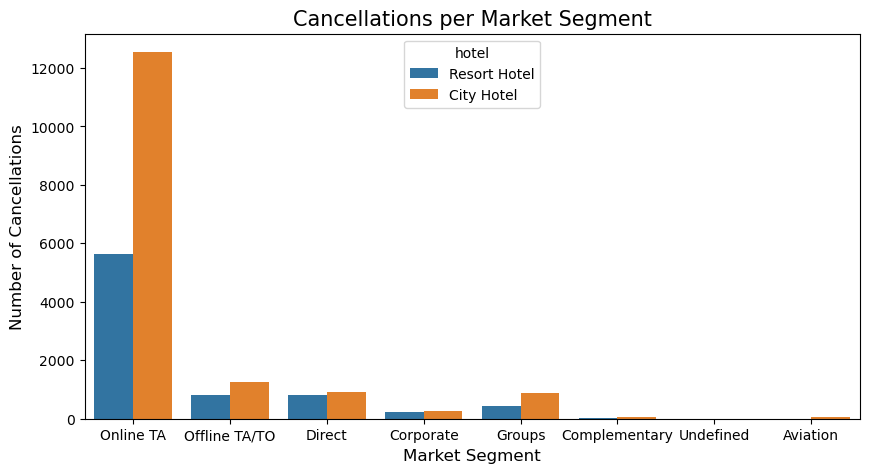

In [54]:
plt.figure(figsize=(10,5))
plt.title("Cancellations per Market Segment",size=12)

sns.countplot(data=df_canc,x='market_segment',hue='hotel')
plt.ylabel("Number of Cancellations",size=12)
plt.xlabel("Market Segment",size=12)

### 8) Analyzing the number of repeated guests who have cancelled bookings

In [55]:
df_canc.groupby('hotel')['is_repeated_guest'].value_counts(normalize=True)  #count of repeated guests



hotel         is_repeated_guest
City Hotel    0                    0.988215
              1                    0.011785
Resort Hotel  0                    0.990971
              1                    0.009029
Name: is_repeated_guest, dtype: float64

In [151]:
a=city_canc[(city_canc['assigned_room_type']=='A')|(city_canc['assigned_room_type']=='D')]
a=a[a['is_repeated_guest']==1]  
a.loc[:,['is_repeated_guest','is_canceled','assigned_room_type','hotel']]

,is_repeated_guest,is_canceled,assigned_room_type,hotel
73714,1,1,A,City Hotel
73715,1,1,A,City Hotel
73735,1,1,A,City Hotel
73754,1,1,A,City Hotel
73774,1,1,A,City Hotel
...,...,...,...,...
107997,1,1,A,City Hotel
108459,1,1,A,City Hotel
111355,1,1,A,City Hotel
111924,1,1,A,City Hotel


In [154]:
168/len(city_canc)*100

1.0530934620447565

In [152]:
b=resort_canc[(resort_canc['assigned_room_type']=='A')|(resort_canc['assigned_room_type']=='D')|(resort_canc['assigned_room_type']=='E')]
b=b[b['is_repeated_guest']==1]  
b.loc[:,['is_repeated_guest','is_canceled','assigned_room_type','hotel']]

,is_repeated_guest,is_canceled,assigned_room_type,hotel
14681,1,1,A,Resort Hotel
14777,1,1,E,Resort Hotel
14817,1,1,A,Resort Hotel
14823,1,1,D,Resort Hotel
14826,1,1,A,Resort Hotel
...,...,...,...,...
27135,1,1,A,Resort Hotel
27627,1,1,A,Resort Hotel
29694,1,1,A,Resort Hotel
32073,1,1,E,Resort Hotel


In [155]:
66/len(resort_canc)

0.008276899924755455

In [ ]:
b=resort_canc[(resort_canc['assigned_room_type']=='A')&(resort_canc['assigned_room_type']=='D')]
a[a['is_repeated_guest']==1]  

### 9) Analysing the Country of Origin of Guests

In [103]:
df_canc

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Month
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,2015-06-05,6
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,0,Transient,105.5,0,0,Canceled,2015-04-22,4
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,No Deposit,240.0,0,Transient,123.0,0,0,Canceled,2015-06-23,6
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,No Deposit,240.0,0,Transient,107.0,0,2,Canceled,2015-11-05,11
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,No Deposit,NaN,0,Transient,108.3,0,2,Canceled,2015-05-29,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108829,City Hotel,1,25,2017,May,18,6,2,1,1,...,No Deposit,NaN,0,Transient,125.0,0,0,No-Show,2017-06-05,6
111355,City Hotel,1,4,2017,June,23,5,1,0,1,...,No Deposit,NaN,0,Transient,65.0,0,0,Canceled,2017-05-06,5
111924,City Hotel,1,7,2017,May,22,31,0,1,1,...,No Deposit,NaN,0,Transient,65.0,0,0,Canceled,2017-05-31,5
111925,City Hotel,1,6,2017,July,29,17,1,0,1,...,No Deposit,NaN,0,Transient,65.0,0,0,No-Show,2017-07-17,7


In [125]:
top_10_canc=df_canc['country'].value_counts()[:10]

top_10_canc

PRT    9769
GBR    1981
ESP    1858
FRA    1727
ITA    1070
DEU    1050
BRA     721
IRL     666
USA     456
BEL     408
Name: country, dtype: int64

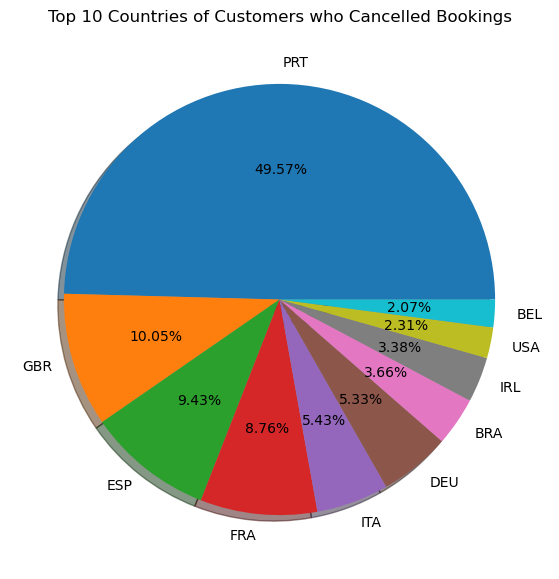

In [138]:
plt.figure(figsize=(10,7))
plt.title("Top 10 Countries of Customers who Cancelled Bookings")
plt.pie(top_10_canc,labels=top_10_canc.index,autopct='%1.2f%%',shadow=True);

In [113]:

city_canc = df_canc[df_canc['hotel']=='City Hotel']
resort_canc = df_canc[df_canc['hotel']=='Resort Hotel']

In [135]:
city_canc['country'].value_counts(normalize=True)[:10]

PRT    0.304852
FRA    0.096540
GBR    0.081181
ESP    0.069835
ITA    0.062563
DEU    0.058175
BRA    0.039493
USA    0.024511
CHN    0.023947
BEL    0.022818
Name: country, dtype: float64

In [136]:
resort_canc['country'].value_counts(normalize=True)[:10]

PRT    0.617418
ESP    0.093632
GBR    0.086333
IRL    0.042663
FRA    0.023534
DEU    0.015354
CHE    0.013214
BRA    0.011452
CN     0.009690
ITA    0.009061
Name: country, dtype: float64

Highest cancellations of City Hotel are from customers from Portugal,France,UK,Spain and Italy.
Highest cancellations of Resort Hotel are from customers from Portugal,Spain,UK,Ireland and France.